<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section8_Lab8_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives :**

-  Load and preprocess an image dataset
-  Build and train a Convolutional Neural Network (CNN)
-  Visualize training curves (accuracy & loss)
-  Evaluate model with test accuracy and confusion matrix
-  Inspect predictions vs actual images

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


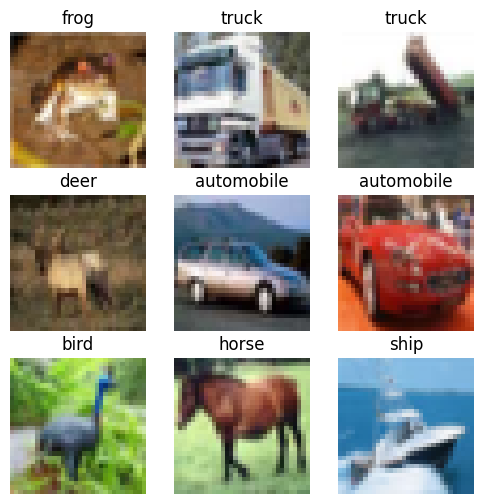

In [56]:
#Step 1 — Load and inspect dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape:", X_train.shape)

print("Test data shape:", X_test.shape)


# Show first 9 images
class_names = ['airplane','automobile','bird','cat','deer',
'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')

plt.show()

Step 2 — Preprocess data


In [57]:
print(X_train.min(), X_train.max())  # should print something like 0 255
print(X_test.min(), X_test.max())    # should print something like 0 255


X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(X_train.min(), X_train.max())  # should print something like 0 1
print(X_test.min(), X_test.max())


0 255
0 255
0.0 1.0
0.0 1.0


Step 3 — Build CNN model


In [58]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,482 (2.08 MB)

 Trainable params: 545,290 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

Step 4 — Train the CNN

In [59]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=64,
                    verbose=2)
#it might take 1 hour too train with 30 epochs ...

Epoch 1/30
625/625 - 93s - 149ms/step - accuracy: 0.3909 - loss: 1.7267 - val_accuracy: 0.4922 - val_loss: 1.4190
Epoch 2/30
625/625 - 88s - 141ms/step - accuracy: 0.5158 - loss: 1.3629 - val_accuracy: 0.5701 - val_loss: 1.2181
Epoch 3/30
625/625 - 142s - 228ms/step - accuracy: 0.5712 - loss: 1.2053 - val_accuracy: 0.5987 - val_loss: 1.1371
Epoch 4/30
625/625 - 147s - 235ms/step - accuracy: 0.6099 - loss: 1.0990 - val_accuracy: 0.6128 - val_loss: 1.0955
Epoch 5/30
625/625 - 93s - 148ms/step - accuracy: 0.6452 - loss: 1.0066 - val_accuracy: 0.6321 - val_loss: 1.0417
Epoch 6/30
625/625 - 88s - 141ms/step - accuracy: 0.6736 - loss: 0.9338 - val_accuracy: 0.6438 - val_loss: 1.0144
Epoch 7/30
625/625 - 81s - 130ms/step - accuracy: 0.6957 - loss: 0.8636 - val_accuracy: 0.6494 - val_loss: 0.9994
Epoch 8/30
625/625 - 83s - 132ms/step - accuracy: 0.7165 - loss: 0.8026 - val_accuracy: 0.6633 - val_loss: 0.9626
Epoch 9/30
625/625 - 147s - 235ms/step - accuracy: 0.7377 - loss: 0.7455 - val_accurac

Step 5 — Plot training curves


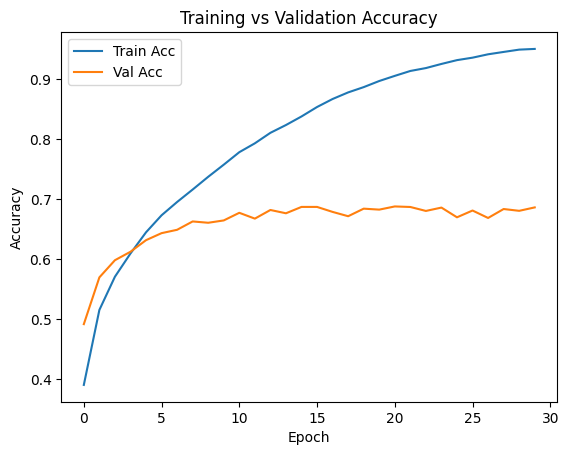

In [60]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

thats obiously aan overfitting ..

we can fix that by :

    EARLY stoping
    Dropout Layers
    Data Augmentation
    Reduce Complexity
    Weight Decay (L2)

Step 6 — Evaluate on test set


In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.686


Step 7 — Confusion matrix


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


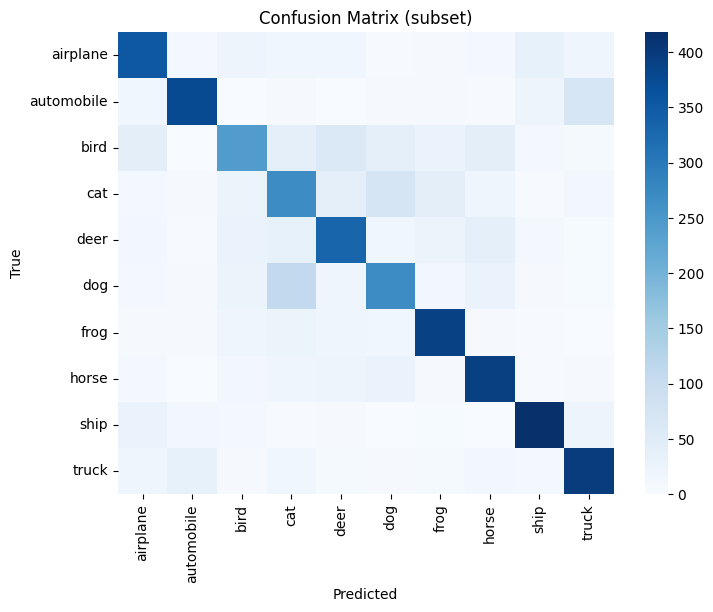

In [62]:
y_pred = np.argmax(model.predict(X_test[:5000]), axis=1)
y_true = y_test[:5000].flatten()
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (subset)")
plt.show()

Step 8 — Visualize predictions

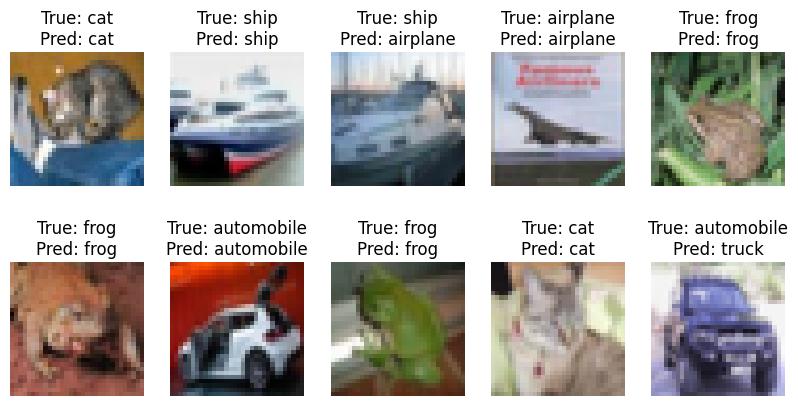

In [63]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.title(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[y_pred[i]]}")
  plt.axis('off')
plt.show()

In [64]:
model.save("cifar10_cnn_model.h5")


Step 9 — Experiment with architecture

-  Increase filters (Conv2D(64, …))
-  Add extra convolutional layers
+  Change dropout rate
+ Train for more epochs

Observe accuracy changes & signs of overfitting

Step 10 — Reflection Questions
1. Why do we normalize image pixel values?
2. What role do convolution and pooling layers play?
3. How did dropout help the model?
4. Did your model overfit or underfit? How do you know?
5. What could be next (transfer learning, ResNet, data augmentation)?

In [41]:
preds = model.predict(X_test)
print(np.isnan(preds).any())

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
False
